In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

# library 불러오기
library(stringr)
library(plotrix)
library(dplyr)

In [ ]:
baby <- read.csv("Data/R_Baby_Names_1880-2014.csv")

In [ ]:
# baby의 Year부분 정제
baby$Year <- as.numeric(substr(baby$Year,7,10))

# 정제된 변수를 file로 정제하여 저장
write.csv(baby,"Data/baby.csv",row.names = F)

In [ ]:
# baby에서 여자 아이만 Female이라는 dataset을 만들고, row수 구하기
Female <- subset(baby,Gender == "F")

# 여자 아이 이름 중 유일한 이름만 20개 찾기
unique(Female$Name)[1:20]

# 여자 아이 이름 종류의 갯수
length(unique(Female$Name))

In [ ]:
# 가장 많이 사용된 이름 Top 10
femaleName <- aggregate(Count ~ Name,Female,sum)
head(arrange(femaleName,desc(Count)),10)

In [50]:
# baby에서 남자아이만 dataset
Male <- subset(baby,Gender == "M")

In [ ]:
aggregate(Count ~ Year,Male,sum)
aggregate(Count ~ Year,Female,sum)

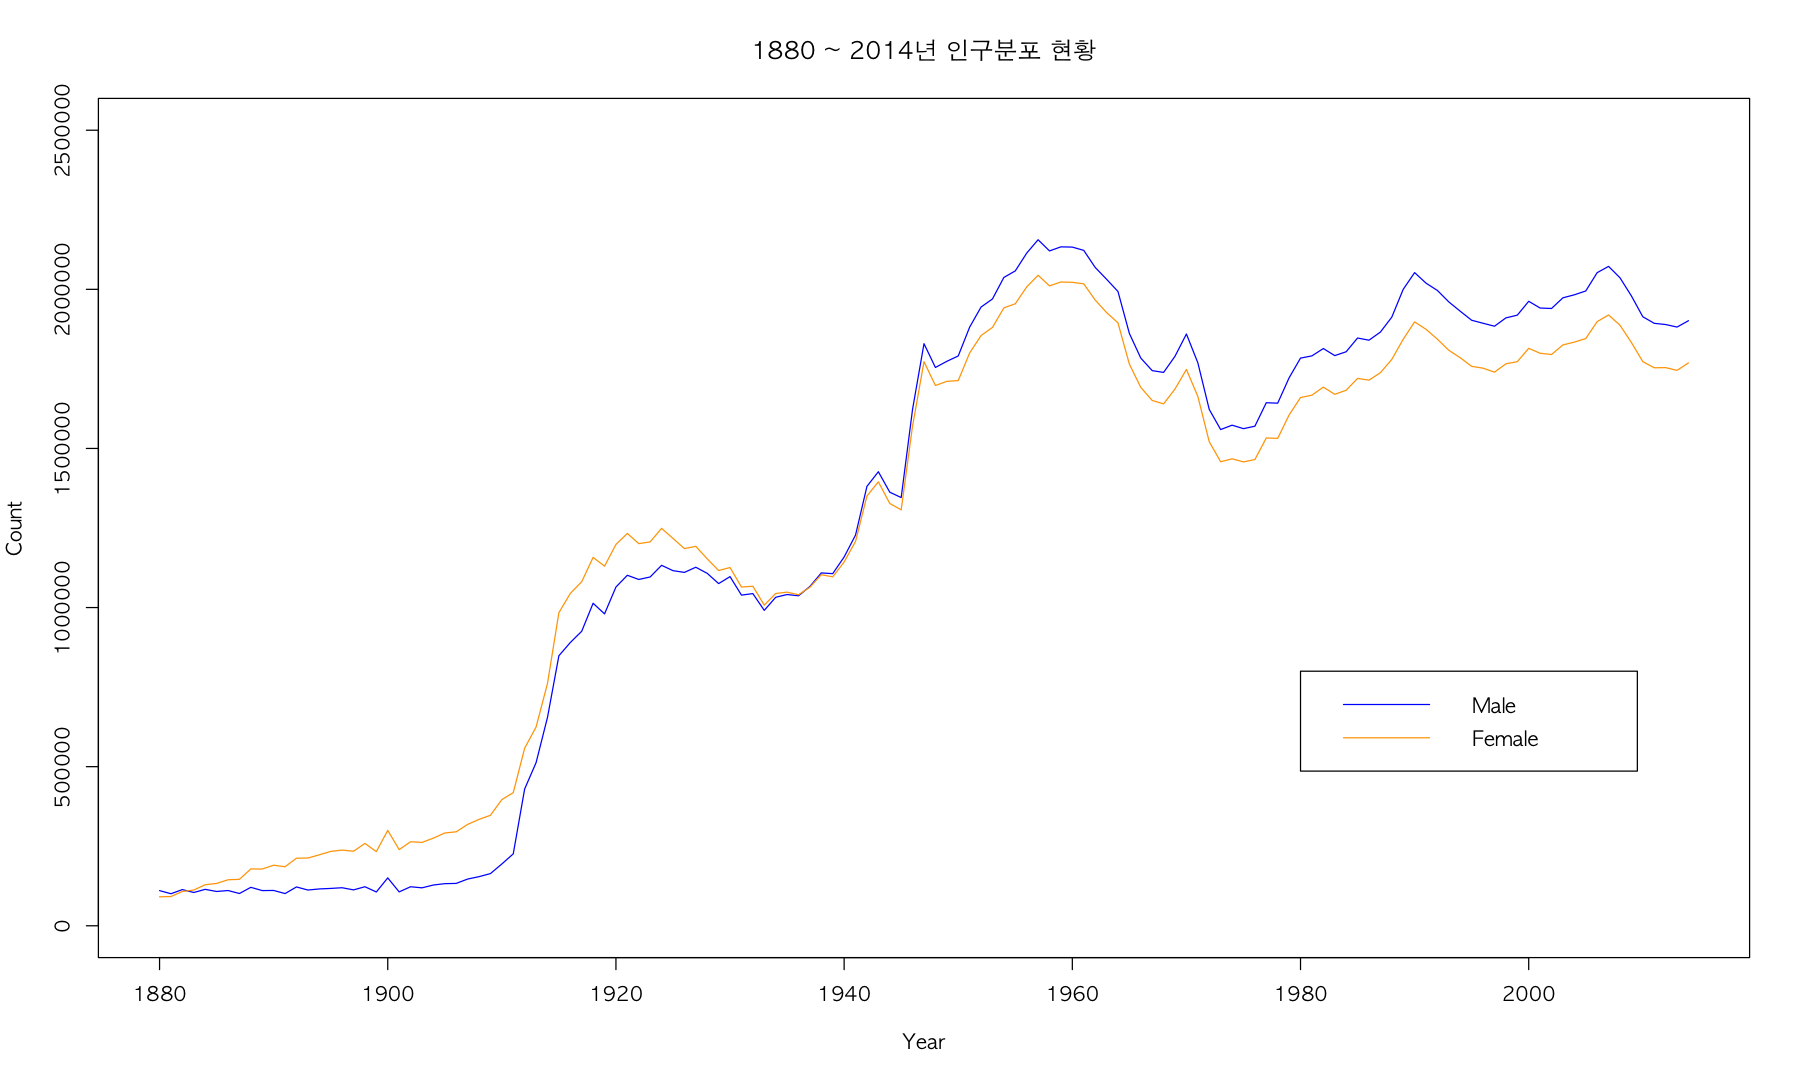

In [95]:
par(family = "AppleGothic",bg = "White")
plot(
    main = "1880 ~ 2014년 인구분포 현황",
    aggregate(Count ~ Year,Male,sum),
    type = "l",
    col = "BLUE",
    ylim = c(0,2500000)
)

lines(
    aggregate(Count ~ Year,Female,sum),
    col = "ORANGE"
)

legend(
    # "bottomright",
    1980,800000,
    legend = c("Male","Female"),
    # fill = c("BLUE","ORANGE"),
    lty = 1,
    col = c("BLUE","ORANGE"),
)